<a href="https://colab.research.google.com/github/alcorrea40/python-colab-notebooks/blob/main/Colab_Tratamiento_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Interactiva #2: Tratamiento de Valores Atípicos
En esta actividad practicarás distintas estrategias para tratar valores atípicos, incluyendo su eliminación, imputación con medidas estadísticas, y transformaciones como logaritmo o raíz cuadrada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid')

## 1. Crear un conjunto de datos con outliers

In [2]:
np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=100)
data_with_outliers = np.append(data, [120, 130, 140])
df = pd.DataFrame({'valor': data_with_outliers})
df.describe()

,valor
count,103.000000
mean,52.910757
std,16.780406
min,24.470102
25%,43.934141
50%,51.269121
75%,58.209633
max,140.000000


## 2. Visualizar los datos con boxplot

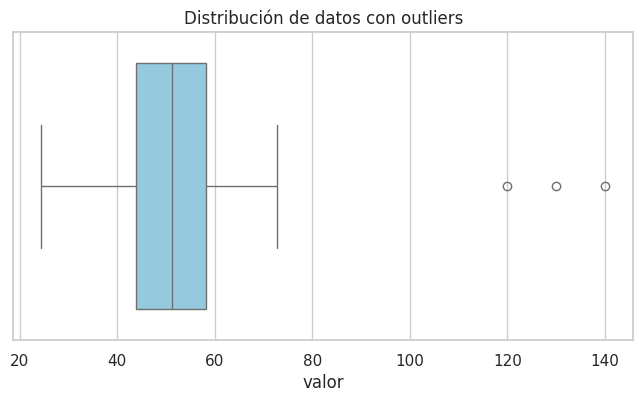

In [3]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['valor'], color='skyblue')
plt.title('Distribución de datos con outliers')
plt.show()

## 3. Eliminar outliers usando IQR

In [4]:
Q1 = df['valor'].quantile(0.25)
Q3 = df['valor'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sin_outliers = df[(df['valor'] >= lower_bound) & (df['valor'] <= upper_bound)]
df_sin_outliers.describe()

,valor
count,100.000000
mean,50.598080
std,10.129598
min,24.470102
25%,43.561433
50%,50.940961
75%,57.370774
max,72.697546


## 4. Reemplazar outliers por la mediana

In [5]:
mediana = df['valor'].median()
df_imputado = df.copy()
df_imputado.loc[(df['valor'] < lower_bound) | (df['valor'] > upper_bound), 'valor'] = mediana
df_imputado.describe()

,valor
count,103.000000
mean,50.617625
std,9.980165
min,24.470102
25%,43.934141
50%,51.269121
75%,57.178319
max,72.697546


## 5. Aplicar transformaciones logarítmicas y raíz cuadrada

In [6]:
# Evitar valores negativos o cero antes de log
df_transformado = df.copy()
df_transformado['log_valor'] = np.log(df_transformado['valor'] + 1)
df_transformado['sqrt_valor'] = np.sqrt(df_transformado['valor'])
df_transformado[['valor', 'log_valor', 'sqrt_valor']].head()

,valor,log_valor,sqrt_valor
0,67.640523,4.228883,8.224386
1,54.001572,4.007362,7.348576
2,59.787380,4.107382,7.732230
3,72.408932,4.296046,8.509344
4,68.675580,4.243850,8.287073


## ✅ Conclusión
Has aprendido diferentes formas de tratar valores atípicos: eliminándolos, reemplazándolos por la mediana y transformando los datos. Cada técnica tiene ventajas y desventajas dependiendo del contexto del análisis.